Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Optimal solution: [2. 3.]
Minimum value: 1.9999999999999938

KKT multipliers (only for active constraints): [-2.]
Dual feasibility (λ ≥ 0): False

Complementary slackness (λᵢ·gᵢ ≈ 0):
λ[0]·g[0] = 7.105e-15 (should be ≈ 0)


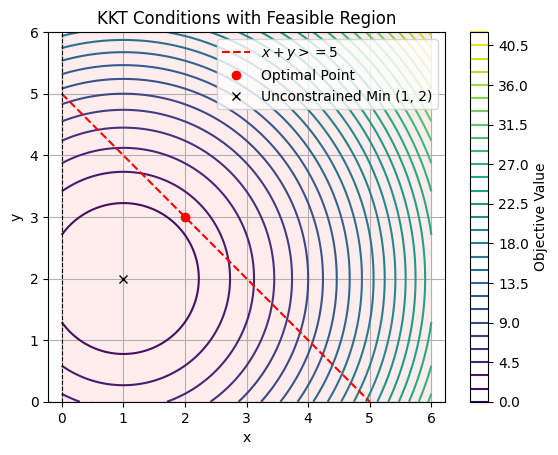

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

cond = 5
# ---------------------
# Objective function
def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

# Inequality constraints: g(x) ≥ 0 form
def g1(x): return x[0] + x[1] - cond     # x + y ≥ 2
def g2(x): return x[0]                # x ≥ 0
def g3(x): return x[1]                # y ≥ 0

constraints = [
    {'type': 'ineq', 'fun': g1},
    {'type': 'ineq', 'fun': g2},
    {'type': 'ineq', 'fun': g3}
]

# Initial guess
x0 = [1, 1]

# Solve using SLSQP
result = minimize(f, x0, method='SLSQP', constraints=constraints)

x_star = result.x

# ---------------------
# Output results
print("Optimal solution:", x_star)
print("Minimum value:", f(x_star))

# ---------------------
# KKT Verification

# Gradient of objective at x*
grad_f = np.array([2*(x_star[0] - 1), 2*(x_star[1] - 2)])

# Gradients of constraints
grad_g1 = np.array([1, 1])
grad_g2 = np.array([1, 0])
grad_g3 = np.array([0, 1])

# Constraint values at x*
g_vals = np.array([g1(x_star), g2(x_star), g3(x_star)])

# Identify active constraints
active = np.isclose(g_vals, 0)

# Collect gradients of active constraints
active_grads = []
for i, is_active in enumerate(active):
    if is_active:
        active_grads.append([grad_g1, grad_g2, grad_g3][i])

# Solve for multipliers
if active_grads:
    A = np.stack(active_grads).T
    lambdas = np.linalg.lstsq(A, -grad_f, rcond=None)[0]
else:
    lambdas = np.array([])

# Print KKT multipliers and checks
print("\nKKT multipliers (only for active constraints):", lambdas)
print("Dual feasibility (λ ≥ 0):", np.all(lambdas >= -1e-5))

print("\nComplementary slackness (λᵢ·gᵢ ≈ 0):")
active_idx = 0
for i, is_active in enumerate(active):
    if is_active:
        val = lambdas[active_idx] * g_vals[i]
        print(f"λ[{i}]·g[{i}] = {val:.3e} (should be ≈ 0)")
        active_idx += 1

# ---------------------
# Visualization

# Create mesh grid
x_vals = np.linspace(0, cond + 1, 400)
y_vals = np.linspace(0, cond + 1, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 1)**2 + (Y - 2)**2

# Plot contours
plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.colorbar(label='Objective Value')

# Shade infeasible region (x + y < 2)
infeasible = X + Y < cond
plt.contourf(X, Y, infeasible, levels=1, colors=['#ffdddd'], alpha=0.5)

# Plot constraint lines
plt.plot([0, cond], [cond, 0], 'r--', label='$x + y >= ' + str(cond) + '$')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)

# Plot optimal point
plt.plot(x_star[0], x_star[1], 'ro', label='Optimal Point')

# Plot unconstrained minimum
plt.plot(1, 2, 'kx', label='Unconstrained Min (1, 2)')

# Final plot setup
plt.title('KKT Conditions with Feasible Region')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()
